In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<center><h1>Diagnóstico de doenças</h1></center>
<b>Problema-</b> Um sistema de uma determinada detecção de doença atribui -1 a um diagnóstico negativo e 1 ao positivo, entretanto, devido ao ruído do corpo humano esse sinal é corrompido. Utilize a teoria da deteccão para estimar o real diagnóstico paciente.Assuma que o ruído  corpo humano segue um distribuição normal de média zero e variância  unitária. Utilize pelo menos 3 métodos diferentes de detecção.

-O conjunto de dados fornecido possui amostras relativas a 1000 pacientes


In [2]:
#link - https://drive.google.com/file/d/1K60g8xxIZF0ZwqjTFDDcYpGa8j6Z3yX0/view?usp=sharing
dados = pd.read_csv("transmitido.csv") #Sinal original

Text(0.5, 0, 'Diagnóstico')

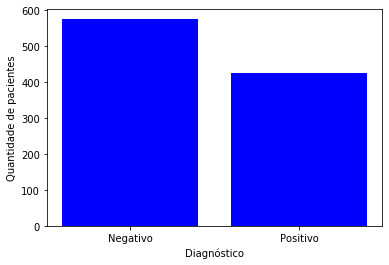

In [36]:
positivo =0
negativo  = 0
for i in range(0, len(y)):
    if x[i]==1:
        positivo =1+positivo
           
    else:
        negativo =1+ negativo
plt.bar([1,2],[negativo,positivo],color='b')
plt.xticks([1,2],['Negativo','Positivo'])
plt.ylabel('Quantidade de pacientes')
plt.xlabel('Diagnóstico')

<StemContainer object of 3 artists>

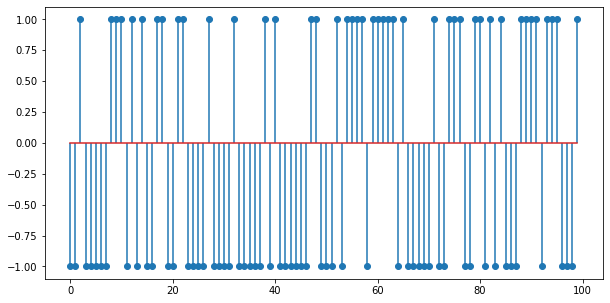

In [3]:
plt.figure(figsize=(10,5))
plt.stem(dados['valor'][0:100],use_line_collection=True )

In [4]:
x = dados['valor']
n = np.random.normal(0, 1, len(x))
y =  x + n #Sinal corrompido

Text(0.5, 1.0, 'PDF ruído AWNG')

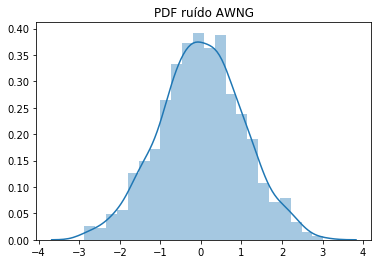

In [5]:
sns.distplot(n,hist=True, kde=True)
plt.title('PDF ruído AWNG')

([<matplotlib.axis.XTick at 0x2a37b802988>,
 <a list of 2 Text xticklabel objects>)

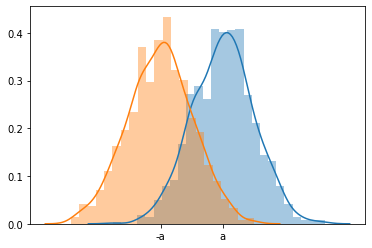

In [6]:
sns.distplot(np.random.normal(1,1, len(x)),hist=True, kde=True)
sns.distplot(np.random.normal(-1,1, len(x)),hist=True, kde=True)
plt.xticks([-1,1],['-a','a'])

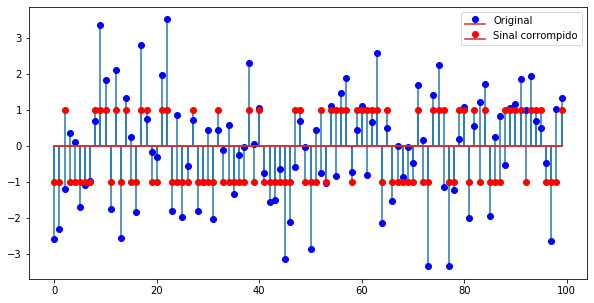

In [7]:
plt.figure(figsize=(10,5))
plt.stem(y[0:100],use_line_collection=True,markerfmt='bo',label='Original' )
plt.stem(x[0:100],use_line_collection=True,markerfmt='ro',label='Sinal corrompido' )
plt.legend()

<center><h1>Critério MAP </h1></center>
Dadas duas hipóteses H0 e H1, a decisão consiste em determinar qual é a mais provável, dado um conjunto de observações

$$ L\left ( y \right ) = \frac{p\left ( y |H_ 1\right )}{p\left ( y|H_ 0 \right )}$$


A função $L\left ( y \right )$ é chamada de razão de verossimilhaça. Como a função ln(·) é monotônica, uma decisão equivalente seria equivalente a


$$   \iota  = ln\left [ L\left ( y \right ) \right ]$$



 $p\left ( H_ 0 \right ) =\pi_ 0$   - Probabilidade de ocorrer $$
 $p\left ( H_ 1 \right ) =\pi_ 1$

In [8]:
yh = []
for i in range(0, len(y)):
    if y[i]>0:
          yh.append(1)
    else:
        yh.append(-1)


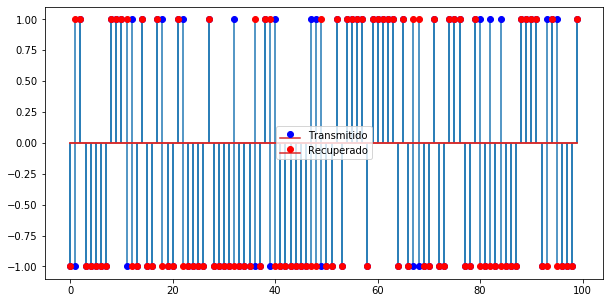

In [76]:
plt.figure(figsize=(10,5))
plt.stem(x[0:100],use_line_collection=True, markerfmt='bo',label='Transmitido')
plt.stem(yh[0:100],use_line_collection=True , markerfmt='ro',label='Recuperado')
plt.legend()
plt.show()

In [11]:
pi0 = 0.3;
pi1 = 0.7;
C10 = 1;
C00 = 0;
C01 = 2;
C11 = 0; 
nb = (pi0*(C10-C00))/(pi1*(C01-C11)) 

<center><h1>Critério Bayes </h1></center>


<ol>
<li>$P_{00}$: um correto diagnóstico, sem custos</li>
<li>$P_{01}$: um incorreto diagnóstico de uma doença realmente existente, alto custo</li>
<li> $P_{10}$ e $P_{11}$: decisão pelo diagnóstico da doença em sua ausência.
</li>
</ol>
 Seja $C_{ij}$ o custo de decidir $D_{i}$ quando a hipótese $H_j$ é correta.A função $L\left ( y \right )$  é dada por 
$$ L\left ( y \right ) = \frac{\pi _{0}\left ( C_{10}-C_{00} \right )}{\pi_{1}\left ( C_{01}-C_{11}\right )} $$

O teste de Bayes exige o conhecimento dos custos de decisão: $C_{10}$,$C_{00}$,$C_{01}$ e $C_{11}$.
 

In [12]:
yb = []
for i in range(0, len(y)):
    if y[i]>nb:
          yb.append(1)
    else:
        yb.append(-1)


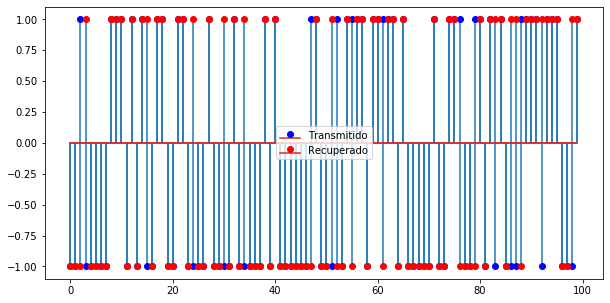

In [13]:
plt.figure(figsize=(10,5))
plt.stem(x[0:100],use_line_collection=True, markerfmt='bo',label='Transmitido')
plt.stem(yb[0:100],use_line_collection=True , markerfmt='ro',label='Recuperado')
plt.legend()
plt.show()

<center><h1>Critério Minimax </h1></center>
 
Esse  critério  utiliza como requisito somente o conhecimento dos custos de decisão.Seu princípio consiste em assumir um valor $\alpha$ para a probabilidade a priori $\pi_{0}$. Com isso, o limiar de Bayes é escrito como:


$$\eta_b =  \frac{\alpha\left ( C_{10}-C_{00} \right )}{\left (1-\alpha  \right )\left ( C_{01}-C_{11}\right )}$$



In [14]:
a =0.6; 
nmm =  (a*(C10-C00))/((1-a)*(C01-C11)); 

In [15]:
ymm = []
for i in range(0, len(y)):
    if y[i]>nmm:
          ymm.append(1)
    else:
        ymm.append(-1)


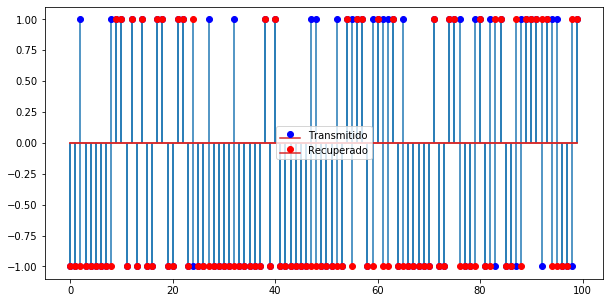

In [16]:
plt.figure(figsize=(10,5))
plt.stem(x[0:100],use_line_collection=True, markerfmt='bo',label='Transmitido')
plt.stem(ymm[0:100],use_line_collection=True , markerfmt='ro',label='Recuperado')
plt.legend()
plt.show()

In [17]:
erros = []
labels = ['MAP','Bayes','Mini max']
mm  = 0
map  = 0
bayes=0
for i in range(0, len(y)):
    if x[i]!=yh[i]:
          map =1+ map   
for i in range(0, len(y)):
    if x[i]!=yb[i]:
          bayes =1+ bayes
for i in range(0, len(y)):
    if x[i]!=ymm[i]:
          mm =1+ mm
erros.append(100*map/len(x))
erros.append(100*bayes/len(x))
erros.append(100*mm/len(x))

Text(0, 0.5, 'Taxa de erro')

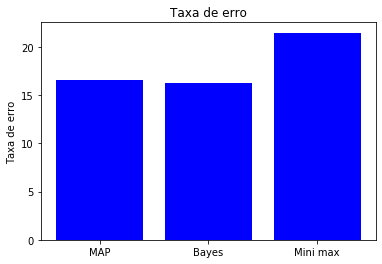

In [18]:
plt.bar(range(len(erros)),erros,color='b')
plt.title('Taxa de erro')
plt.xticks(range(len(erros)),labels)
plt.ylabel('Taxa de erro')

In [29]:
def falsadectec(yhat):
    fe = 0
    for i in range(0, len(yhat)):
        if x[i]==-1 and yhat[i]==1:
              fe =1+ fe
              
    return (100*fe/len(yhat))
def errodec(yhat):
    fe = 0
    for i in range(0, len(yhat)):
        if x[i]==1 and yhat[i]==-1:
              fe =1+ fe
              
    return (100*fe/len(yhat))
        

Text(0, 0.5, 'Taxa de erro')

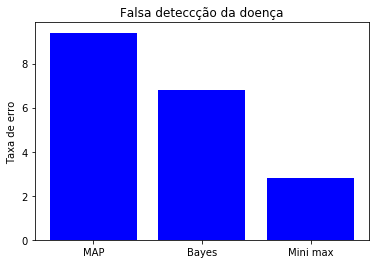

In [30]:
falsadecteccao = []
falsadecteccao.append(falsadectec(yh))
falsadecteccao.append(falsadectec(yb))
falsadecteccao.append(falsadectec(ymm))
plt.bar(range(len(erros)),falsadecteccao,color='b')
plt.title('Falsa deteccção da doença')
plt.xticks(range(len(falsadecteccao)),labels)
plt.ylabel('Taxa de erro')

Text(0, 0.5, 'Taxa de erro')

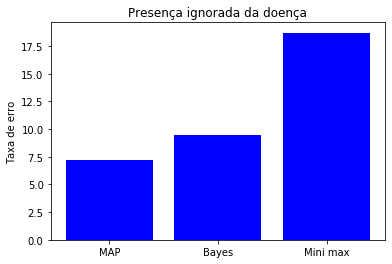

In [31]:
ed = []
ed.append(errodec(yh))
ed.append(errodec(yb))
ed.append(errodec(ymm))
plt.bar(range(len(erros)),ed,color='b')
plt.title('Presença ignorada da doença')
plt.xticks(range(len(ed)),labels)
plt.ylabel('Taxa de erro')